[0 0 0 ... 0 0 0]


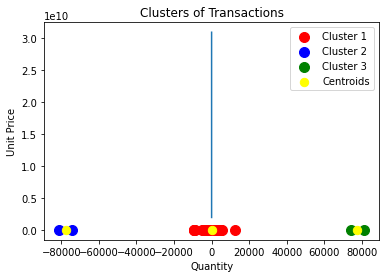

In [1]:
# Introduction 

# In this project, we will consider the 'OnlineRetail' dataset 
# from kaggle, which consists of features like 'Quantity' and 
# 'UnitPrice' for a list of transactions.

# Our task is find the optimal number of clusters
# for the given data, and to predict which cluster 
# does each of those transaction belong to.

# Importing the Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Dataset

# 'unicode_escape' was added to avoid the Unicode Decode Error

df = pd.read_csv('../input/online-retail-customer-clustering/OnlineRetail.csv', encoding = 'unicode_escape')
df.head()

# From the above dataset, we will only be considering the features
# 'Quantity' and 'UnitPrice' for the array X

X = df.iloc[:, [3, 5]].values

# Using the Elbow Method to find the Optimal Number of Clusters

from sklearn.cluster import KMeans
wcss = []

# We consider a range of no's from 1 to 7
# which also denotes the number of clusters

for i in range(1, 8):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  # Fitting k-means to array X  
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

# From the above plot, we observe, while the x axis value goes from 1 to 3
# the WCSS decreases rapidly, and while the x axis value goes from 3 to 7,
# the WCSS decreases slowly.

# This tells us that the optimal number
# of clusters is 3.

# Training the k-means model to the array X, 
# then predicting what cluster does each transaction belong to.

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

# Since we considered two features 'Quantity' and 'UnitPrice',
# it is possible for us to visualize the clusters 
# using a 2d plot / scatterplot.

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Transactions')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.legend()
plt.show()